# Assignment 2
This notebook imports SPI (Soccer Power Index) data from FiveThirtyEight, a data analytics website that focuses on politics, economics, and sports blogging. 

## Importing
I begin by importing several visualization libraries, along with numpy and pandas 

In [8]:
#import visualization tools
import seaborn as sns #seaborn is a library that uses matplotlib to make styled plots
import plotly_express as px #plotly express is a library for drawing interactive figures
import hypertools as hyp #hypertools is a library for visualizing "high-dimensional" data

#import data wrangling tools
import pandas as pd
import numpy as np

%matplotlib inline

In [9]:
#Source: https://github.com/fivethirtyeight/data/tree/master/soccer-spi
club_data = pd.read_csv('spi_global_rankings.csv') #load FiveThirtyEight data on soccer club rankings into a DataFrame
print(type(club_data)) 
club_data.set_index('rank', inplace = True) #change index to ranking
club_data.head() #display first 5 rows of data set

<class 'pandas.core.frame.DataFrame'>


,prev_rank,rank_change,name,league,off,def,spi
rank,,,,,,,
1,1,0,Manchester City,Barclays Premier League,3.12,0.20,94.75
2,2,0,Liverpool,Barclays Premier League,2.82,0.22,92.89
3,4,1,Bayern Munich,German Bundesliga,3.16,0.39,92.57
4,3,-1,Barcelona,Spanish Primera Division,3.23,0.43,92.43
5,5,0,Paris Saint-Germain,French Ligue 1,2.96,0.44,90.54


## Data Cleaning
This cell is dedicated to cleaning the data. The first section re-orders the columns so that the club names are right next to the ranking / index. Additionally, this order clumps all of the numerical data. Thankfully, the numerical data is quite clean. I use a line to transform any non-numerical data cells to numerical figures, but none of them result in NaN. Lastly, I renamed all of the column headers to more official / detailed names.

In [10]:
#re-order the columns so that the club name comes first after rank
club_col = club_data.columns.tolist()
club_col = club_col[2:] + club_col[:2]
club_data = club_data[club_col] 

#Turned any non-numerical numbers into numberical numbers; None resulted in NaN
club_data.loc[2:, 'off':] = club_data.loc[2:, 'off':].apply(lambda x: pd.to_numeric(x, errors='coerce'))

#create a dictionary that specifies columns to rename and their new names
col_names = {'name': 'Club Name',
         'league': 'Professional League',
         'off': 'Offensive Score',
         'def': 'Defensive Score',
         'spi': 'Soccer Power Index',
         'prev_rank': 'Previous Rank',
         'rank_change': 'Change in Rank'}
club_data.rename(col_names, inplace=True, axis=1) #rename the given columns using the dictionary

club_anony = club_data.drop(['Club Name','Professional League'], inplace=False, axis = 1) #create an anonymized version of the DataFrame without non-numerical data

club_data.head()

,Club Name,Professional League,Offensive Score,Defensive Score,Soccer Power Index,Previous Rank,Change in Rank
rank,,,,,,,
1,Manchester City,Barclays Premier League,3.12,0.20,94.75,1,0
2,Liverpool,Barclays Premier League,2.82,0.22,92.89,2,0
3,Bayern Munich,German Bundesliga,3.16,0.39,92.57,4,1
4,Barcelona,Spanish Primera Division,3.23,0.43,92.43,3,-1
5,Paris Saint-Germain,French Ligue 1,2.96,0.44,90.54,5,0


## SPI by Offensive Score Plot
Using Seaborn, I plot the Soccer Power Index (SPI) values on Offensive Score values, while coloring the data points by league. SPI and Offensive Scores have a tight linear relationship because a team's SPI is at least partially based on a its offensive abilities, in addition to defense, how much it spends in the transfer market, and match performance. 

Looking at the coloring, the teams with the strongest offense are from the Premier League, Bundesliga, and Spanish Division. These leagues traditionally attract superstar attacking talents, and the respective teams also perform well in continental competitions. The Italian Serie A hosts many teams that have high SPIs, yet their offensive scores are lower on average -- this league is traditionally known for its defensive emphasis.

In [11]:
#Plot of Soccer Power Index on Offensive Score by national league 
#sns.relplot(x="Offensive Score", y="Soccer Power Index", hue="Professional League", data=club_data);
px.scatter(club_data, x="Offensive Score", y="Soccer Power Index", color="Professional League")

In [12]:
club_array = club_anony.values #converts the anonymized data set into a numpy array
#I initially tried to do this with the full data set, but something about having text-based data points was messing up the plotting

## Multi-Dimensional Visualization
Plots the anonymized numpy array that was created. I'm not 100% sure how to interpret this multi-dimensional data without the club information or league information. It seems that these are plotted by individual rankings.

I initially attempted to create this plot with the full data set, but several errors kept popping up. One error mentioned that not all of the data being "float" format, which inspired me to drop the first two columns. I had previously also tried manually converting everything to "float," but that method was unsuccessful. 

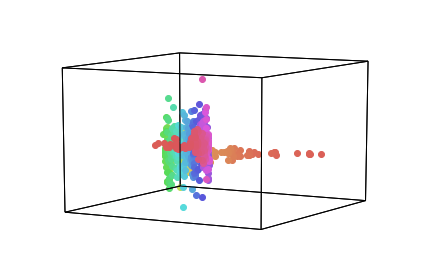

In [13]:
hyp.plot(club_array, 'o', hue=np.array(club_data.index), reduce='FastICA')